## Data loading

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# First glimpse of all the available movies in the dataset

column_movies = ["film_id", "movie_id", "title", "release_date", "gross_revenue", "duration_min", "language", "country", "categories"]

movies_df = pd.read_csv('./Data/MovieSummaries/movie.metadata.tsv', sep='\t', header=None, names=column_movies)
movies_df.head()

,film_id,movie_id,title,release_date,gross_revenue,duration_min,language,country,categories
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"


In [3]:
# Example of local analysis (maybe useful later)

korean_movies = movies_df[movies_df['country'].str.contains('Korea')]
korean_movies.head()

,film_id,movie_id,title,release_date,gross_revenue,duration_min,language,country,categories
119,3873713,/m/0b4f1s,Lee Dae-ro Can't Die,2005-08-18,4736013.0,108.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/02kdv5l"": ""Action"", ""/m/01z4y"": ""Comedy""}"
124,24282217,/m/07sb8_t,The Naked Kitchen,2009-02-05,638181.0,102.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/03q4nz"": ""World cinema"", ""/m/01t_vv"": ""Co..."
197,748616,/m/03813g,"Spring, Summer, Fall, Winter... and Spring",2003-08-14,9524745.0,95.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea"", ""/m/0345h"": ""Germa...","{""/m/07s9rl0"": ""Drama"", ""/m/03q4nz"": ""World ci..."
220,20119316,/m/04yfw36,Eoudong,1985-09-28,NaN,110.0,{},"{""/m/06qd3"": ""South Korea""}","{""/m/07s9rl0"": ""Drama""}"
300,35567084,/m/0j9n5v7,I AM.,2012-05-15,NaN,130.0,"{""/m/02hwhyv"": ""Korean Language""}","{""/m/06qd3"": ""South Korea""}","{""/m/0jtdp"": ""Documentary""}"


In [4]:
# Dataframe of all the characters in the movies

column_characters = ["film_id", "movie_id", "release_date", "character", "born_date", "gender", "height", "ethnicity", "actor_name", "actor_age_at_movie_release", "actor_map_ID","character_ID","actor_ID"]

character_df = pd.read_csv('./Data/MovieSummaries/character.metadata.tsv', sep='\t', header=None, names = column_characters)
character_df.sample(10)

,film_id,movie_id,release_date,character,born_date,gender,height,ethnicity,actor_name,actor_age_at_movie_release,actor_map_ID,character_ID,actor_ID
1037,4608923,/m/0ccf4s,2005,NaN,NaN,NaN,NaN,NaN,John E. Breen,NaN,/m/0gxl7xn,NaN,/m/0gxl7xq
300386,6964031,/m/0gz148,2003,Anand Rao,1948-09-04,M,1.800,NaN,Anant Nag,54.0,/m/04htymg,/m/0h759f0,/m/07dw1v
164608,13228511,/m/03bzj2g,1999,NaN,1961-09-18,M,NaN,NaN,Kiichi Nakai,37.0,/m/040kbp9,NaN,/m/026hjz6
100773,3943470,/m/0b7ydt,1996-03-15,NaN,1962-10-11,F,1.750,/m/033tf_,Joan Cusack,33.0,/m/0cg0ysw,NaN,/m/01fwpt
60781,89445,/m/0m9tw,1998-10-16,Kylie Owens,1987-09-07,F,1.680,/m/06v41q,Evan Rachel Wood,11.0,/m/03btf07,/m/03btf0b,/m/03_vx9
87504,21235052,/m/05c3ftd,1952-02-28,NaN,1914-07-04,M,NaN,NaN,Roberto Escalada,37.0,/m/05cj2vn,NaN,/m/027y5pj
211025,23080180,/m/064ntrl,2009-05-29,Rahul,1978-11-30,M,NaN,NaN,Jeet,30.0,/m/0k3g918,/m/0kf5644,/m/04lj2_b
372328,4584458,/m/0cb4fv,1999-11-19,Rani,1975-01-31,F,1.620,NaN,Preity Zinta,24.0,/m/03jsfl_,/m/0gxts04,/m/025p38
200719,1261599,/m/04n36t,1943,Don Remigio,1910-10-02,M,NaN,NaN,Michele Riccardini,32.0,/m/0cbwz5r,/m/0cbwz5v,/m/0cbwz61
332050,2450828,/m/07d_6n,2003,NaN,1975-10-09,M,1.676,NaN,Joseph McFadden,27.0,/m/0k6rrr,NaN,/m/07j69v


In [5]:
# List of different actors 
actors = character_df['actor_name'].unique()

# Number of actors per movie  
films = character_df.groupby('movie_id').actor_name.count()

# Number of characters per movie 
char = character_df.groupby('movie_id').character.count()

We may look at the frequency of different actors (nb of movies/year), look at the histogram of number of times each actor played (distrib), look at when the age started (distrib), ...

## Frequency of presence in movies per year 

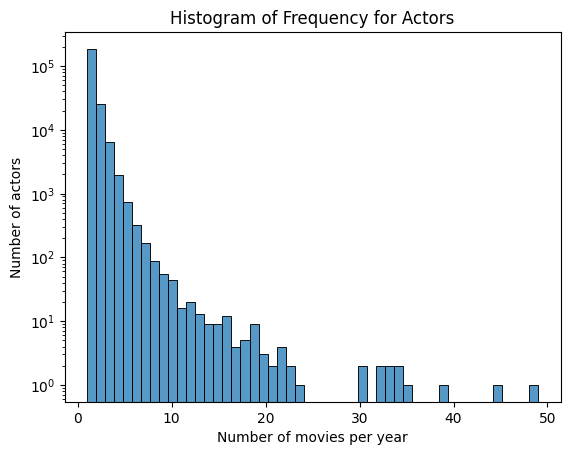

In [6]:
character_df['release_date'] = pd.to_datetime(character_df['release_date'], errors='coerce')

frequency_df = character_df.groupby(['actor_name', character_df['release_date'].dt.year]).size().reset_index(name='movie_count')
sns.histplot(frequency_df['movie_count'], bins = 50, log = True)
plt.ylabel("Number of actors")
plt.xlabel("Number of movies per year")
plt.title('Histogram of Frequency for Actors')
plt.show()

Possible limitations of the graph : outliers (we may look at who they are) and does a huge frquency over one year is better than a constant lower frequency ?  

In [7]:
frequency_max = frequency_df.sort_values(by='movie_count', ascending=False)
top5_frequency = frequency_max.head(5)
print(top5_frequency)

             actor_name  release_date  movie_count
180202  Roscoe Arbuckle        1914.0           49
156501     Oliver Hardy        1916.0           45
76332      Harold Lloyd        1919.0           39
180201  Roscoe Arbuckle        1913.0           35
32608   Charlie Chaplin        1914.0           34


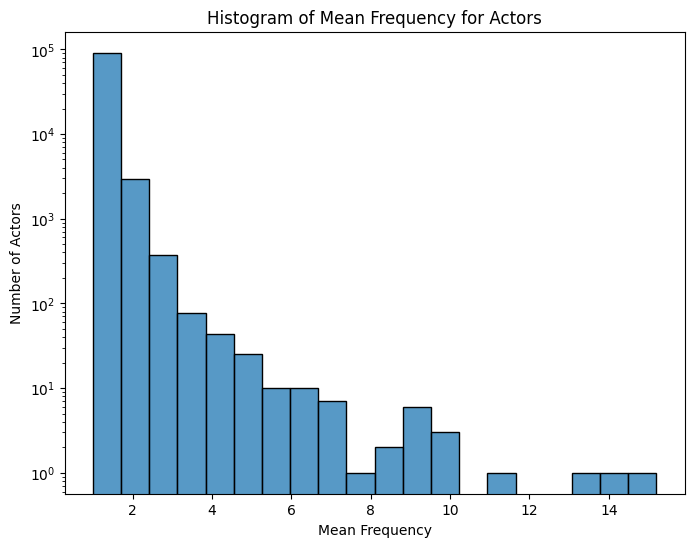

In [8]:
mean_frequency = frequency_df.groupby('actor_name')['movie_count'].mean().reset_index(name='mean_frequency')

plt.figure(figsize=(8, 6))
sns.histplot(mean_frequency['mean_frequency'], bins=20,log = True, kde=False)
plt.xlabel('Mean Frequency')
plt.ylabel('Number of Actors')
plt.title('Histogram of Mean Frequency for Actors')
plt.show()

In [9]:
top5_actors_mf = mean_frequency.nlargest(5, 'mean_frequency')
print(top5_actors_mf)

             actor_name  mean_frequency
14425  Charlotte Burton            15.2
54785     Louise Lester            14.0
37143        Jack Davis            13.5
90908       Vivian Rich            11.2
13107    Caroline Cooke            10.0


When we search for all these actors, we can see that they are all from the beginning of the movie industry (1910s, early 1920s) when the movies were quite short and silent, so the artistic approach was way more simplified as today. In fact, Roscoe Arbuckle worked as the same time as an actor, a screenwriter and a producer. 

By highlighting that, we could assess that taking into account the period at which the movies were produced is critical. 

## Career span 

C:\Users\malou\AppData\Local\Temp\ipykernel_6400\134398040.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_career_span['career_span'] = valid_career_span['career_span'].dt.days


               actor_name  career_span
20406         Jean Angelo        37979
36934          Piet Fuchs        35952
40319           Ruth Hart        35625
35722      Paul Capellani        35383
47825     William Russell        35294
...                   ...          ...
38164  Remington Franklin            0
9755       Dashiell Eaves            0
18978           J.W. King            0
28232         Luan Peters            0
40023  Rossana Di Lorenzo            0

[44413 rows x 2 columns]


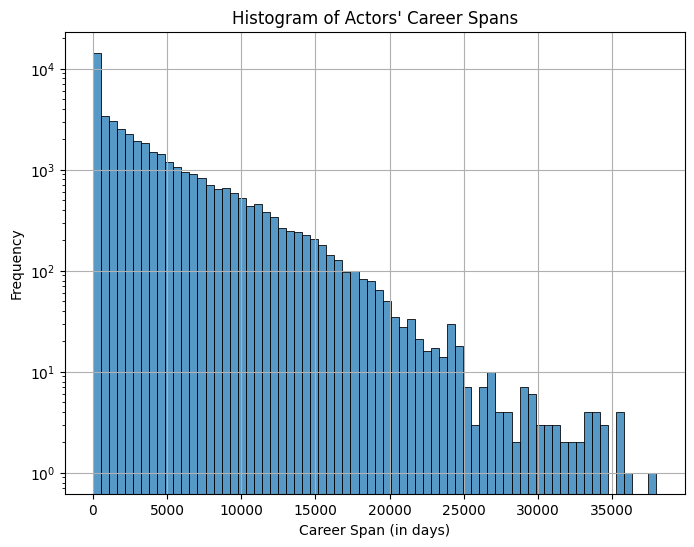

In [10]:
character_df['release_date'] = pd.to_datetime(character_df['release_date'], errors='coerce')

actor_counts = character_df.groupby('actor_name').size().reset_index(name='appearance_count')
actors_multi_appearances = actor_counts[actor_counts['appearance_count'] > 1]
actor_multiple_appearances = character_df[character_df['actor_name'].isin(actors_multi_appearances['actor_name'])]

actor_career_span = actor_multiple_appearances.groupby('actor_name')['release_date'].agg(['min', 'max']).reset_index()
actor_career_span['career_span'] = actor_career_span['max'] - actor_career_span['min']
actor_career_span = actor_career_span[actor_career_span['actor_name'].isin(actors_multi_appearances['actor_name'])]

sorted_actor_span = actor_career_span.sort_values(by='career_span', ascending=False)

valid_career_span = sorted_actor_span.dropna(subset=['career_span'])
valid_career_span['career_span'] = valid_career_span['career_span'].dt.days
print(valid_career_span[['actor_name', 'career_span']])

plt.figure(figsize=(8, 6))
sns.histplot(valid_career_span['career_span'], bins=70, log = True, edgecolor='black')
plt.xlabel('Career Span (in days)')
plt.ylabel('Frequency')
plt.title('Histogram of Actors\' Career Spans')
plt.grid(True)
plt.show()

## Number of movies per actor

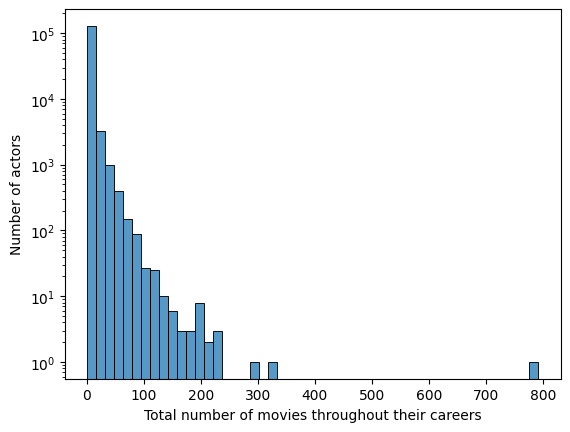

In [11]:
actor_total_movie_counts = character_df.groupby('actor_name').size().reset_index(name='total_movie_count')

sns.histplot(actor_total_movie_counts['total_movie_count'], bins=50, log = True, kde=False)
plt.ylabel("Number of actors")
plt.xlabel("Total number of movies throughout their careers")
plt.show()

Who have been involved in 791 movies ?!

In [12]:
sorted_actors = actor_total_movie_counts.sort_values(by='total_movie_count', ascending=False)
top_5_actors = sorted_actors.head(5)
print(top_5_actors)

               actor_name  total_movie_count
86136           Mel Blanc                791
90201  Mithun Chakraborty                328
95972        Oliver Hardy                299
90474            Mohanlal                234
90355          Moe Howard                225


Ok, interesting, in fact Mel Blanc is involved in all the movies because he was the voice of the well-known duo of Tom and Jerry and other less known productions where he acted as a 'double-role'. And the code does not take into account that it represents 'one' role. Here is the corrected version :

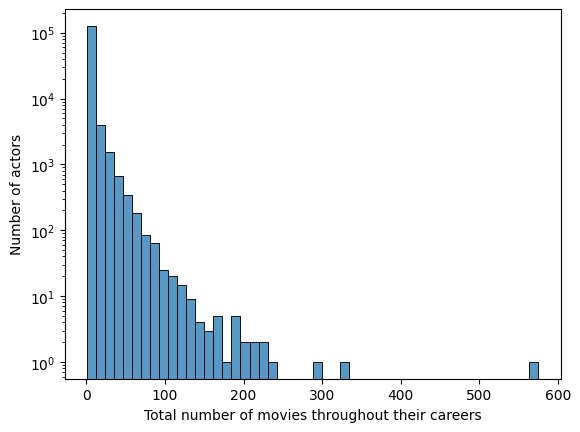

In [13]:
actor_movie_comb = character_df.groupby(['actor_name', 'movie_id']).size().reset_index(name = 'appearance_count')

actor_total_movie_counts_corrected = actor_movie_comb.groupby('actor_name').size().reset_index(name = 'total_movie_count')
sns.histplot(actor_total_movie_counts_corrected['total_movie_count'], bins=50, log=True)
plt.ylabel("Number of actors")
plt.xlabel("Total number of movies throughout their careers")
plt.show()

In [14]:
sorted_actors_corrected = actor_total_movie_counts_corrected.sort_values(by='total_movie_count', ascending=False) 
top_5_actors_corrected = sorted_actors_corrected.head(5)
print(top_5_actors_corrected)

               actor_name  total_movie_count
86136           Mel Blanc                575
90201  Mithun Chakraborty                328
95972        Oliver Hardy                299
90474            Mohanlal                234
79708           Mammootty                225


Even after correction, the top 4 remains still but another indian actor joins the leaderboard : Mammootty. In fact, we may have to consider productions locally and by period too, because the leaderboard is exclusively from America in the early ages of cinema and from India nowadays for example.

## Number of different characters interpreted

Another possibility would be to consider whether the actor is able to interpret a wide range of roles or to act as the same character all his career. 

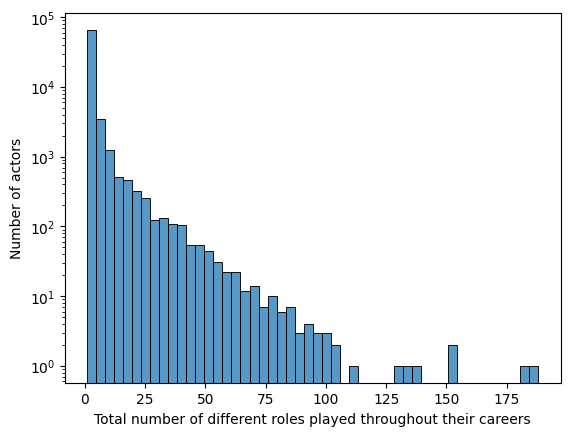

In [15]:
nb_roles = character_df.groupby(['actor_name', 'character']).size().reset_index(name='role_count')

nb_roles = nb_roles.groupby('actor_name').size().reset_index(name='role_count')
sns.histplot(nb_roles['role_count'], bins=50, log=True, kde=False)
plt.ylabel("Number of actors")
plt.xlabel("Total number of different roles played throughout their careers")
plt.show()

We could delve into the details of each roles but this dataset might have missing values concerning characters played. Indeed, the proportion of missing values concerning missing characters is way above 50% so is it relevant to pursue this analysis ? 

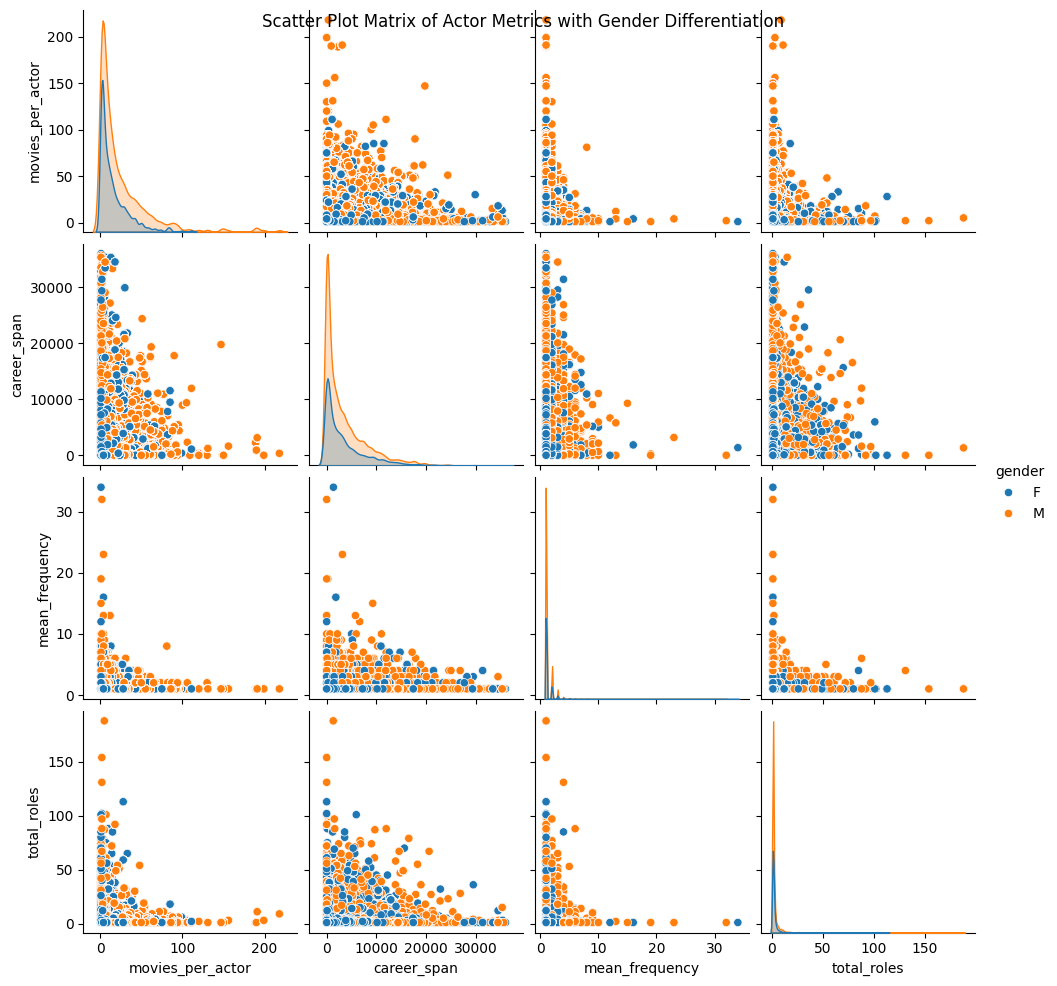

In [20]:
actor_metrics = pd.DataFrame({
    'actor_name': actor_total_movie_counts_corrected['actor_name'],
    'movies_per_actor': actor_total_movie_counts_corrected['total_movie_count'],
    'career_span': valid_career_span['career_span'],  
    'mean_frequency': frequency_df['movie_count'],
    'total_roles': nb_roles['role_count']
})

# Merge gender information into actor_metrics
actor_metrics = actor_metrics.merge(character_df[['actor_name', 'gender']], on='actor_name', how='inner')

# Drop NaN or unwanted characters
actor_metrics = actor_metrics.dropna()  

# Scatter Plot Matrix with log transformation on diagonal terms and hue by 'gender'
g = sns.pairplot(actor_metrics, hue='gender')
plt.suptitle('Scatter Plot Matrix of Actor Metrics with Gender Differentiation')
plt.show()